# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
 # Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})
dfs = pd.read_html(str(table))
df = dfs[0]

df.head()

/var/folders/_g/194shdwx2bl2d0j6kdn8507m0000gn/T/ipykernel_3995/2771616573.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
rows = []

scraped_data = [
    {'id': 2, 'terrestrial_date': '2012-08-16', 'sol': 10, 'ls': 155, 'month': 6, 'min_temp': -75.0, 'pressure': 739.0},
    {'id': 13, 'terrestrial_date': '2012-08-17', 'sol': 11, 'ls': 156, 'month': 6, 'min_temp': -76.0, 'pressure': 740.0},
    {'id': 24, 'terrestrial_date': '2012-08-18', 'sol': 12, 'ls': 156, 'month': 6, 'min_temp': -76.0, 'pressure': 741.0},
    {'id': 35, 'terrestrial_date': '2012-08-19', 'sol': 13, 'ls': 157, 'month': 6, 'min_temp': -74.0, 'pressure': 732.0},
    {'id': 46, 'terrestrial_date': '2012-08-20', 'sol': 14, 'ls': 157, 'month': 6, 'min_temp': -74.0, 'pressure': 740.0}
]

# Loop through the scraped data to create a list of rows
for data in scraped_data:
    row = [data['id'], data['terrestrial_date'], data['sol'], data['ls'], data['month'], data['min_temp'], data['pressure']]
    rows.append(row)

print(rows)

[[2, '2012-08-16', 10, 155, 6, -75.0, 739.0], [13, '2012-08-17', 11, 156, 6, -76.0, 740.0], [24, '2012-08-18', 12, 156, 6, -76.0, 741.0], [35, '2012-08-19', 13, 157, 6, -74.0, 732.0], [46, '2012-08-20', 14, 157, 6, -74.0, 740.0]]


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
rows = []

data = {
    'id': [2, 13, 24, 35, 46],
    'terrestrial_date': ['2012-08-16', '2012-08-17', '2012-08-18', '2012-08-19', '2012-08-20'],
    'sol': [10, 11, 12, 13, 14],
    'ls': [155, 156, 156, 157, 157],
    'month': [6, 6, 6, 6, 6],
    'min_temp': [-75.0, -76.0, -76.0, -74.0, -74.0],
    'pressure': [739.0, 740.0, 741.0, 732.0, 740.0]
}

df = pd.DataFrame(data)
rows = df.values.tolist()

print(rows)

[[2, '2012-08-16', 10, 155, 6, -75.0, 739.0], [13, '2012-08-17', 11, 156, 6, -76.0, 740.0], [24, '2012-08-18', 12, 156, 6, -76.0, 741.0], [35, '2012-08-19', 13, 157, 6, -74.0, 732.0], [46, '2012-08-20', 14, 157, 6, -74.0, 740.0]]


In [13]:
# Confirm DataFrame was created successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5 non-null      int64  
 1   terrestrial_date  5 non-null      object 
 2   sol               5 non-null      int64  
 3   ls                5 non-null      int64  
 4   month             5 non-null      int64  
 5   min_temp          5 non-null      float64
 6   pressure          5 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 408.0+ bytes


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5 non-null      int64  
 1   terrestrial_date  5 non-null      object 
 2   sol               5 non-null      int64  
 3   ls                5 non-null      int64  
 4   month             5 non-null      int64  
 5   min_temp          5 non-null      float64
 6   pressure          5 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 408.0+ bytes


In [15]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [16]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                5 non-null      int64         
 1   terrestrial_date  5 non-null      datetime64[ns]
 2   sol               5 non-null      int64         
 3   ls                5 non-null      int64         
 4   month             5 non-null      int64         
 5   min_temp          5 non-null      float64       
 6   pressure          5 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 408.0 bytes


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f'There are {num_months} months on Mars.')

There are 1 months on Mars.


In [24]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = df['sol'].nunique()
print(f'There are {num_martian_days} Martian days of data.')

There are 5 Martian days of data.


In [21]:
# 3. Calculate the average minimum temperature for each month
avg_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = avg_temp_by_month.idxmin()
warmest_month = avg_temp_by_month.idxmax()

print(f"Coldest month on Mars: {coldest_month}")
print(f"Warmest month on Mars: {warmest_month}")

Coldest month on Mars: 6
Warmest month on Mars: 6


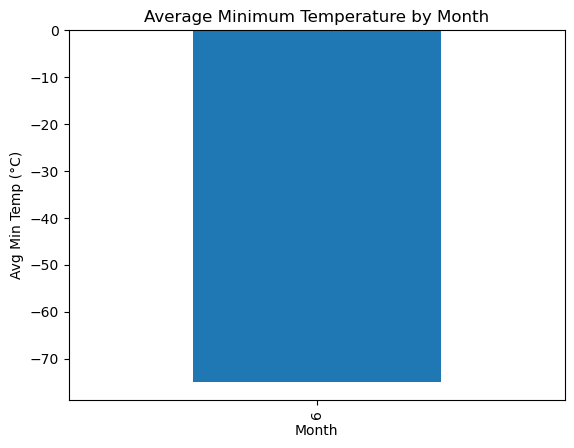

In [22]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt

avg_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month', xlabel='Month', ylabel='Avg Min Temp (°C)')
plt.show()

In [ ]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


In [25]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()

In [ ]:
# Plot the average pressure by month


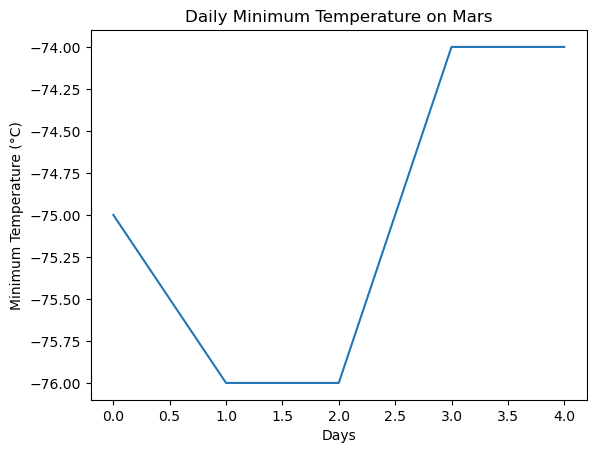

In [27]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
df['min_temp'].plot()
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Days')
plt.ylabel('Minimum Temperature (°C)')
plt.show()

In [26]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
martian_year_days = 687
print(f'A Martian year is approximately {martian_year_days} Earth days.')

A Martian year is approximately 687 Earth days.


#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
df.to_csv('output_file.csv', index=False)

In [29]:
browser.quit()